<a href="https://colab.research.google.com/github/thesuper147/Carbon-Emissions_CS_DSRP/blob/main/Carbon_Emissions_CS_DSRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Question: How are consumer industries' emissions affected by shifts in production?



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import levene
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/SupplyChainEmissions.csv')

df = df.drop(columns=['Reference USEEIO Code'])


df.rename(columns={
    '2017 NAICS Title': 'Industry',
    'Supply Chain Emission Factors without Margins': 'Emissions_No_Margins',
    'Margins of Supply Chain Emission Factors': 'Margins',
    'Supply Chain Emission Factors with Margins': 'Total_Emissions',
    '2017 NAICS Code': 'NAICS Code'
}, inplace=True)

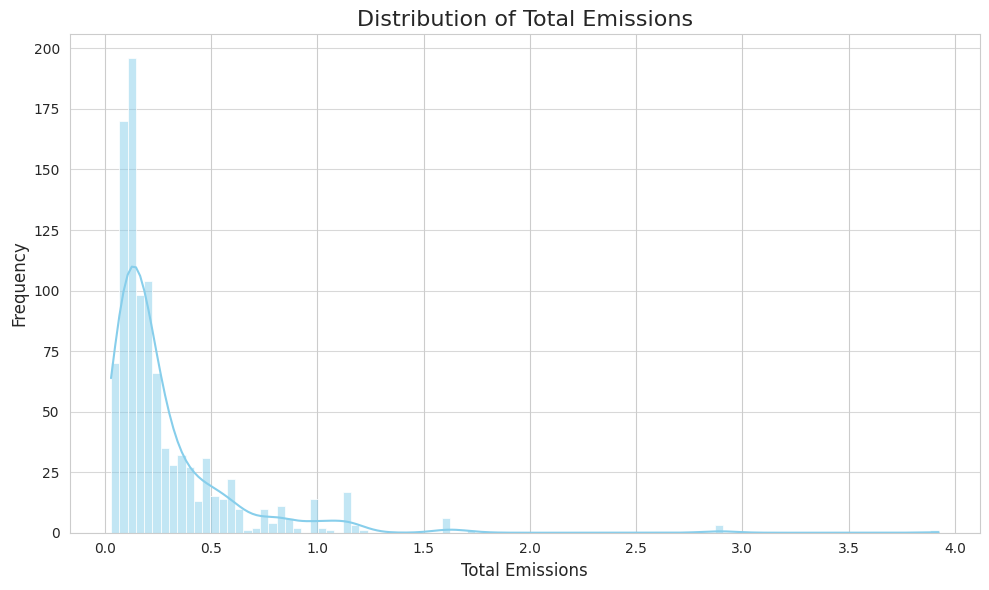

In [12]:
sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Total_Emissions', bins=100, kde=True, color='skyblue')

plt.title('Distribution of Total Emissions', fontsize=16)
plt.xlabel('Total Emissions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.grid(axis='y', alpha=0.75)
plt.tight_layout()


plt.show()


Basic viewing of industry emission scale

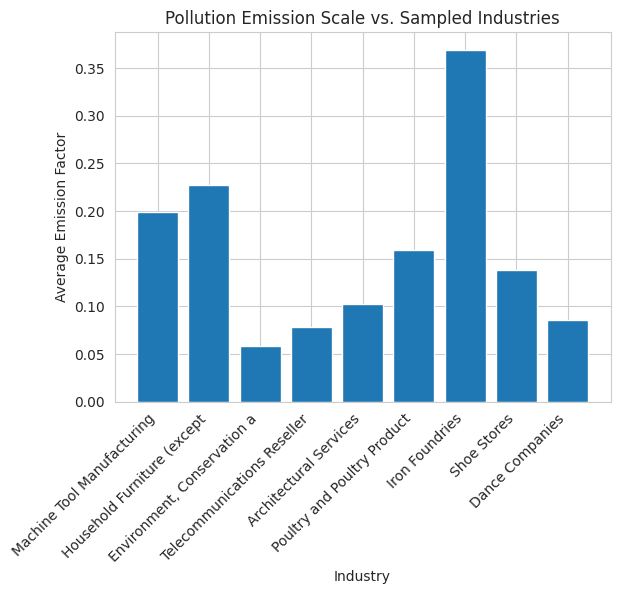

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns



sample_df = df.sample(9)
x = sample_df['Industry']
y = sample_df['Total_Emissions']



plt.bar(x.str[:27],
        y,
        label="Pollution Emission Scale vs. Industry")
plt.xlabel("Industry")
plt.ylabel('Average Emission Factor')
plt.title("Pollution Emission Scale vs. Sampled Industries")
plt.xticks(rotation=45, ha="right")
plt.show()

Mapping data to fit research question through categories

In [8]:
import numpy as np

df_consumer = df.copy()


df_consumer['Consumer Category'] = 'Other'

# filtering of industries (2017 naics title) to create specific categories that are usable for project
keywords_map = {
    'Housing & Utilities': ['Power generation', 'Electric', 'Electricity', 'Residential', 'Construction', 'Natural gas', 'Water', 'Sewer', 'Furniture', 'Appliance', 'Plumbing', 'Gas'],
    'Food, Farming, & Beverages': ['Farm', 'Food', 'Beverage', 'Alcohol', 'Snack', 'Fish', 'Fishing', 'Breakfast', 'Cereal', 'Sugar', 'Winery', 'Brewery', 'Restaurant', 'Grocery', 'Restaurant', 'Tortilla', 'Corn', 'Farming', 'Dining', 'Flour', 'Pasta', 'Bakery', 'Bakeries', 'Convenience'],
    'Transportation': ['Automobile', 'Vehicle', 'Gasoline', 'Air transport', 'Rail', 'Transit', 'Taxi', 'Airplane', 'Car', 'Train', 'Bus', 'Transport'],
    'Fashion': ['Apparel', 'Textile', 'Clothing', 'Fabric', 'Leather', 'Footwear', 'Fashion', 'Designer', 'Jewelry'],
    'Healthcare': ['Hospital', 'Ambulatory', 'Health', 'Pharmaceutical', 'Medical', 'Surgical', 'Surgery', 'Psychology', 'Doctor', 'Pharmacy', 'Veterinary', 'Vet', 'Safety', 'Ambulance', 'Clinic', 'Medicine'],
    'Entertainment / Recreation': ['Hotel', 'Amusement', 'Recreation', 'Museum', 'Arts', 'Spectator sports', 'Book', 'Motion picture', 'Movie', 'TV', 'Gambling', 'Casino', 'Game', 'Sports', 'Gaming', 'Theatre', 'Park'],
    'Financial & Organization Services': ['Securities', 'Insurance', 'Credit', 'Monetary', 'Legal', 'Accounting', 'Bank','Financing', 'Claims', 'Loan', 'Brokers', 'Trust', 'Court', 'Financial', 'Consulting'],
    'Manufacturing and Development': ['Manufacturing', 'Engineering', 'Corperate', 'Production', 'Extraction', 'Fuel', 'Development', 'Research', 'Refining', 'Internet']
}

# Loops through all industries, searches and finds matching keywords, creates a boolean mask, and then assigns it to one of the above categories.
for category, keywords in keywords_map.items():
    sortdef = r'\b(' + '|'.join(keywords) + r')\b'
    bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
    df_consumer.loc[bmask, 'Consumer Category'] = category


# --> samples data for proofing and checking
print("number of industries assigned to each category:")
print(df_final['Consumer Category'].value_counts())

print("\nsample of mapped industries:")
print(df_final[['Industry', 'Consumer Category']].sample(10))

number of industries assigned to each category:


/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning

NameError: name 'df_final' is not defined

Creating a prototype bar plot to display carbon footprint in each created category

In [ ]:
import seaborn as sns

# average emission factor for each consumer categ
emission_factor_avg = df_consumer.groupby('Consumer Category')['Total_Emissions'].mean().sort_values(ascending=False)

print("\ghg emissions by consumer spending category:")
print(emission_factor_avg)


sns.set_style('ticks')
plt.figure(figsize=(12, 8))
sns.barplot(x=emission_factor_avg.values, y=emission_factor_avg.index, palette='crest')
plt.title('Average Emissions by Consumer Spending Category')
plt.xlabel('Average Emission Factor (kg CO2e / 2022 USD spent)')
plt.ylabel('Consumer Category')
plt.grid(axis='x', linestyle='--')
plt.show()

In [ ]:
# I'm importing another dataset with the same industries in order to see the exports value connected to industries

import pandas as pd
import matplotlib as plt
pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/export_value.csv')

exports_df = pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/export_value.csv')
exported_df = exports_df.drop(df.index[[0, 1,2]])
df_cleaned = exported_df.dropna(subset=['Total Exports Value ($US)'])
df_cleaned = df_cleaned.reset_index(drop=True)

print(df_cleaned.head())
print("-------")
print(df_consumer.head())

print("-------")


df_cleaned.head(11)
df_cleaned.head(11)
print("-------")
df_cleaned.info()
df_consumer.info()

In [ ]:
emissions_cat1 = df_consumer[df_consumer['Consumer Category'] == 'Food, Farming, & Beverages']['Total_Emissions']

In [ ]:
emissions_cat2= df_consumer[df_consumer['Consumer Category'] == 'Manufacturing and Development']['Total_Emissions']

In [ ]:
levene(emissions_cat1,emissions_cat2, center='median', proportiontocut=0.05, axis=0, nan_policy='propagate', keepdims=False)

In [ ]:
scipy.stats.ttest_ind(emissions_cat1, emissions_cat2, equal_var=False)

In [ ]:
levene_statistic, levene_pvalue = stats.levene(emissions_cat1, emissions_cat2, center='median')

print(f"levene's test statistic: {levene_statistic:.4f}")
print(f"l  evene's p-value: {levene_pvalue:.4f}")

# reject H0.
if levene_pvalue < 0.05:
    print("Conclusion: The variances are significantly different. We will use Welch's t-test (equal_var=False).")
    equal_variances = False
else:
    pass

In [ ]:
ttest_statistic, ttest_p = stats.ttest_ind(emissions_cat1, emissions_cat2, equal_var=equal_variances)

print("\n--- Independent samples t-test ---")
print(f"T-statistic: {ttest_statistic}")
print(f"P-value: {ttest_p}")

# Interpretation of the result
alpha = 0.05
if ttest_p < alpha:
    print(" The p-value is less than the significance level of 0.05. We reject the null hypothesis.")
    print("There is a statistically significant difference in the mean total emissions between the two consumer categories.")


# You can also get the means to see which group is higher
mean_food_farming = emissions_cat1.mean()
mean_manufacturing = emissions_cat2.mean()
print(f"\nmean emissions for Food, Farming, & Beverages: {mean_food_farming:.2f}")
print(f"Mean emissions for Manufacturing and Development: {mean_manufacturing:.2f}")

In [ ]:
# Combine the data for plotting
import matplotlib.pyplot as plt
plot_df = pd.DataFrame({
    'Category': ['Food, Farming, & Beverages'] * len(emissions_cat1) +
                ['Manufacturing and Development'] * len(emissions_cat2),
    'Total Emissions': list(emissions_cat1) + list(emissions_cat2)
})


sns.boxplot(x='Category', y='Total Emissions', data=plot_df, palette='pastel')
plt.title('Total Emissions by Consumer Category', fontsize=16)
plt.xlabel('Consumer Category', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.show()

In [ ]:

from scipy import stats


consumer_cat = df_consumer['Consumer Category'].unique()
print("all consumer categories:", consumer_cat)

groups = [df_consumer[df_consumer['Consumer Category'] == category]['Total_Emissions'] for category in consumer_cat]

f_statistic, p_value = stats.f_oneway(*groups_to_compare)

print("--- One-Way ANOVA Test ---")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Check the significance of the result
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: The p-value is less than the significance level of 0.05. We reject the null hypothesis.")
    print("There is a statistically significant difference in the mean total emissions among the consumer categories.")
else:
    print("\nConclusion: The p-value is greater than the significance level of 0.05. We fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean total emissions among the consumer categories.")


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Stack the emissions data and group labels
df_anova = pd.DataFrame({
    'Emissions': df_consumer['Total_Emissions'],
    'Category': df_consumer['Consumer Category']
})

tukey_result = pairwise_tukeyhsd(endog=df_anova['Emissions'], groups=df_anova['Category'], alpha=0.05)

print("\n--- Tukey HSD ---")
print(tukey_result)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(x='Consumer Category', y='Total_Emissions', data=df_consumer, palette='viridis')


plt.title('Distribution of Total Emissions Across Consumer Categories', fontsize=18)
plt.xlabel('Consumer Category', fontsize=14)
plt.ylabel('Total Emissions', fontsize=14)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()